In [1]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [2]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1

In [3]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
print(sequences)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_results)
word_index = tokenizer.word_index
print(word_index)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1

In [5]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, dtype = int)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen , dtype = int)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\dell\anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\dell\anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

In [6]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 26s 4ms/step - loss: 0.6852 - acc: 0.5646 - val_loss: 0.6151 - val_acc: 0.7030
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5658 - acc: 0.7454 - val_loss: 0.5251 - val_acc: 0.7344
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4678 - acc: 0.7926 - val_loss: 0.5004 - val_acc: 0.7476
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4214 - acc: 0.8103 - val_loss: 0.4937 - val_acc: 0.7552
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3908 - acc: 0.8279 - val_loss: 0.4947 - val_acc: 0.7540
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3691 - acc: 0.8412 - val_loss: 0.4988 - val_acc: 0.7582
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3446 - acc: 0.8571 - val_loss: 0.5033 - val_acc: 0.7562
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0

In [7]:
import os
imdb_dir = '/Users/dell/OneDrive/Desktop/New Folder/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 10000
validation_samples = 1000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
#print(word_index)

In [10]:
data.shape

(25000, 100)

In [11]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [12]:
for word,i in word_index.items():
    if i < 10:
        print(word, end=" ")
        print(i)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9


In [13]:
glove_dir = '/Users/dell/OneDrive/Desktop/New Folder/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [14]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [15]:
embedding_matrix.shape

(10000, 100)

In [16]:
maxlen

100

In [17]:
from keras. models import Sequential
from keras.layers import Dense,Flatten,Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [19]:
model.compile(loss = 'binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])
history = model.fit(x_train,y_train,epochs=20,batch_size=20,validation_data=(x_val,y_val))

Epoch 1/20
500/500 [==============================] - 7s 9ms/step - loss: 0.7359 - acc: 0.5749 - val_loss: 0.5983 - val_acc: 0.6890
Epoch 2/20
500/500 [==============================] - 4s 8ms/step - loss: 0.5220 - acc: 0.7517 - val_loss: 0.5732 - val_acc: 0.7000
Epoch 3/20
500/500 [==============================] - 4s 8ms/step - loss: 0.4266 - acc: 0.8083 - val_loss: 0.6188 - val_acc: 0.6810
Epoch 4/20
500/500 [==============================] - 4s 8ms/step - loss: 0.3621 - acc: 0.8358 - val_loss: 0.6585 - val_acc: 0.6960
Epoch 5/20
500/500 [==============================] - 4s 9ms/step - loss: 0.3044 - acc: 0.8712 - val_loss: 0.6905 - val_acc: 0.6950
Epoch 6/20
500/500 [==============================] - 4s 8ms/step - loss: 0.2426 - acc: 0.9013 - val_loss: 0.7351 - val_acc: 0.6890
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 0.1960 - acc: 0.9210 - val_loss: 0.7879 - val_acc: 0.6800
Epoch 8/20
500/500 [==============================] - 4s 9ms/step - loss: 0.

In [20]:
model.save_weights('pre_trained_glove_model.h5')

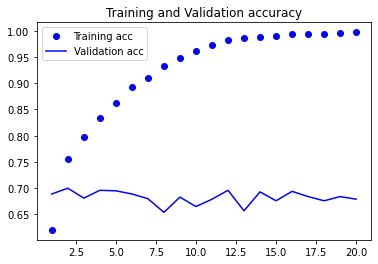

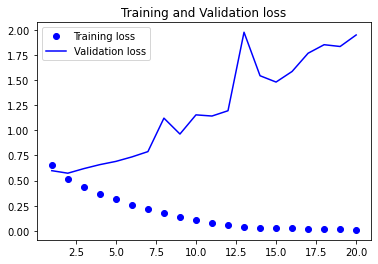

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 , len(acc) + 1)
plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [22]:
test_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_tag in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_tag)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_tag == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [23]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [24]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 1.2746 - acc: 0.8131


[1.2745634317398071, 0.8131200075149536]

In [25]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
print(inputs.shape)

(100, 32)


In [26]:
inputs[0]

array([0.34894359, 0.46071357, 0.02398932, 0.25904895, 0.38258947,
       0.80685488, 0.41398341, 0.72867807, 0.26753813, 0.2465402 ,
       0.67590713, 0.06856914, 0.29795718, 0.70123196, 0.23332061,
       0.45313369, 0.77250346, 0.15442347, 0.59839318, 0.84990267,
       0.30823968, 0.33399658, 0.14488695, 0.97730877, 0.24684784,
       0.5513568 , 0.39737767, 0.8695175 , 0.10597503, 0.68953819,
       0.53410683, 0.2018068 ])

In [37]:
state_t = np.zeros((output_features,))
w = np.random.random((output_features, input_features))
u = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_output = []
for input_t in inputs:
    output_t = np.tanh(np.dot(w,input_t) + np.dot(u,state_t) + b)
    successive_output.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_output, axis = 0)

In [39]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [40]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________
